In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
# Step 1: Load the dataset
# Load the dataset (assumed to be downloaded and saved in the same directory)
data = pd.read_csv('C:/Users/Admin/Desktop/ML online/week8/SeoulBikeData.csv', encoding='ISO-8859-1')
data.head()  # Display first few rows to confirm data loaded correctly


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


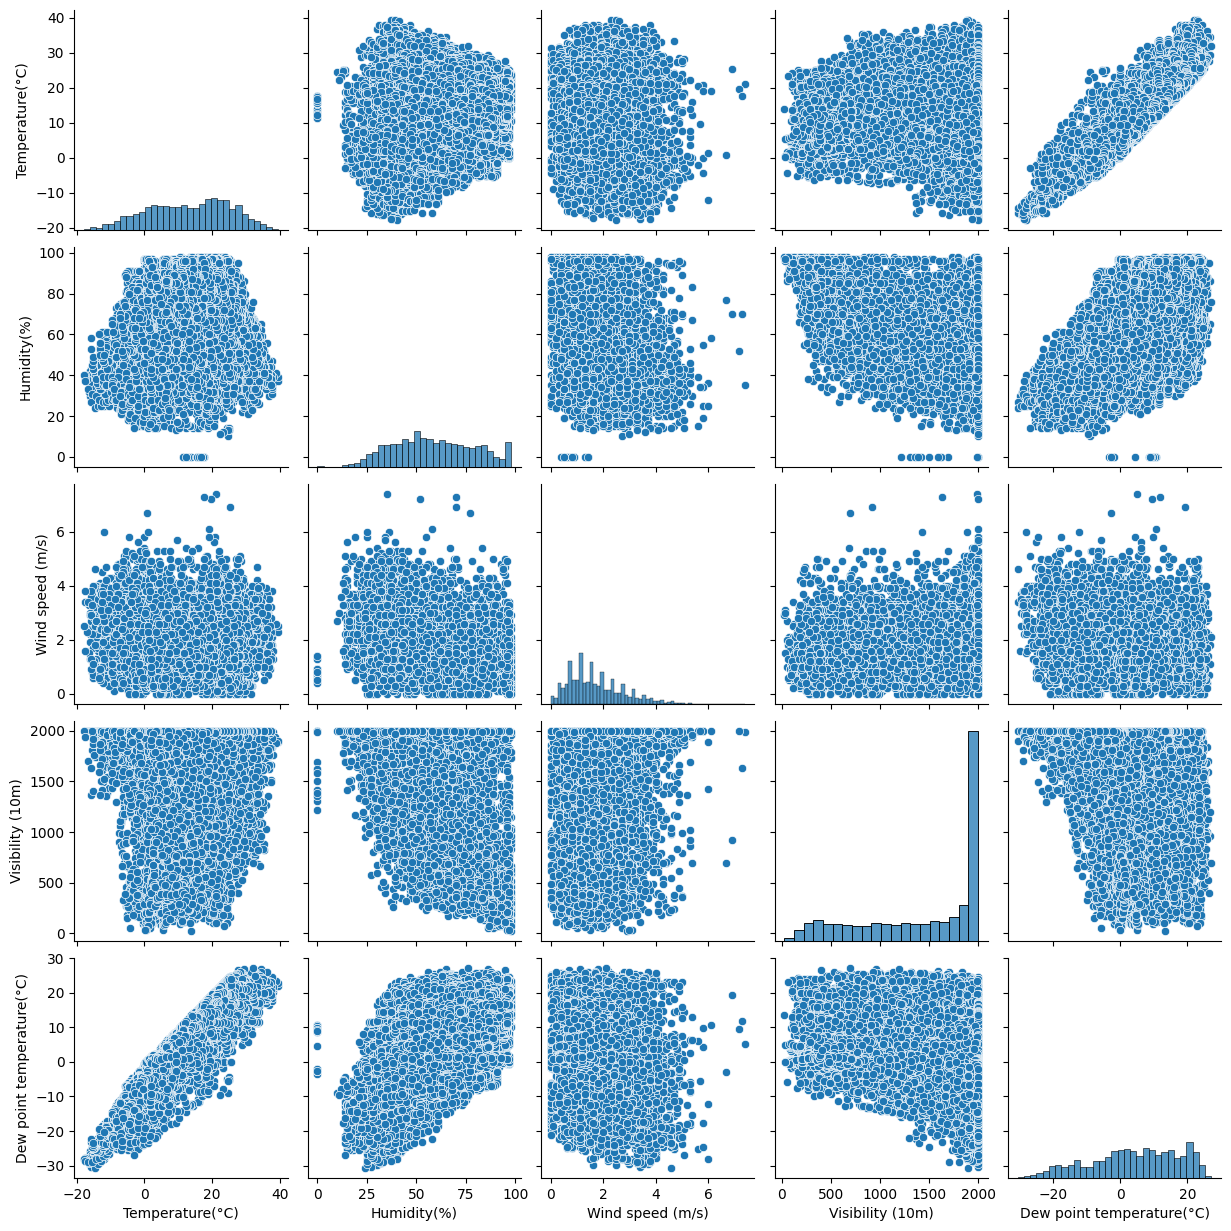

In [3]:
# Step 2: Choose some features and check their correlation with each other
# Choose some features that might be correlated and create pair plots to confirm correlation
features = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)']
sns.pairplot(data[features])  # Plot pairwise relationships
plt.show()

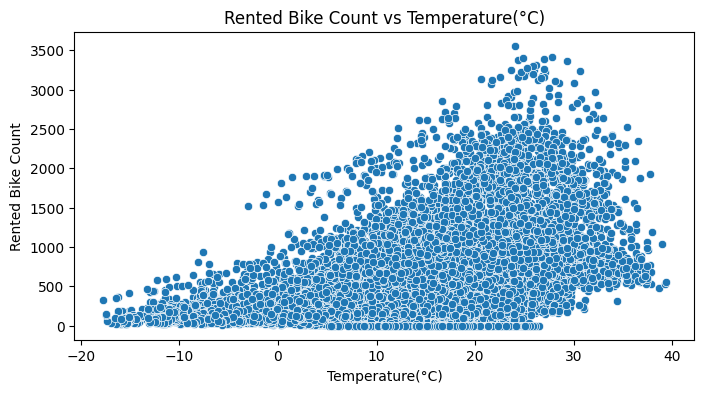

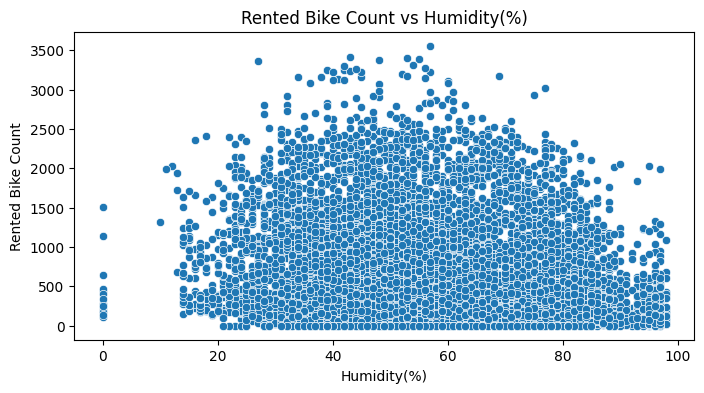

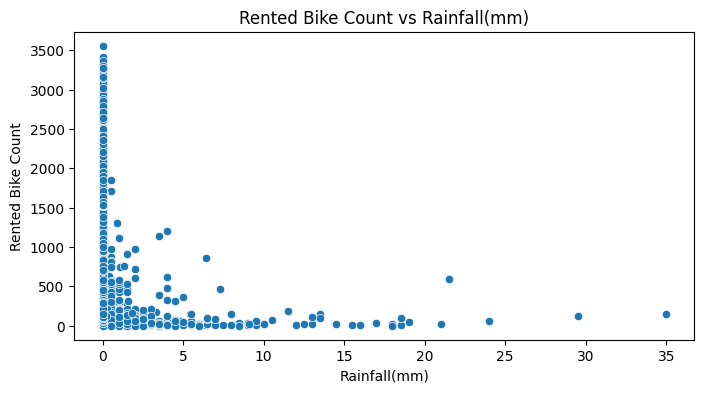

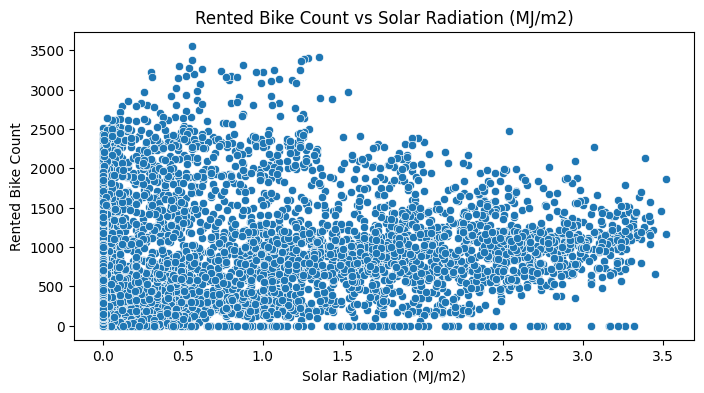

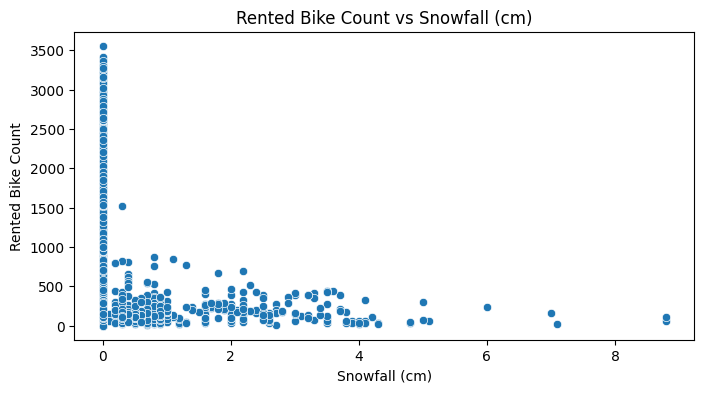

In [4]:
# Step 3: Analyze features that might be correlated with demand
# Select features that might correlate with the demand (rented bike count) and plot them
demand_related_features = ['Temperature(°C)', 'Humidity(%)', 'Rainfall(mm)', 'Solar Radiation (MJ/m2)', 'Snowfall (cm)']
for feature in demand_related_features:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=data[feature], y=data['Rented Bike Count'])
    plt.title(f'Rented Bike Count vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Rented Bike Count')
    plt.show()

In [5]:
# Step 4: Split data into training, validation, and test sets
# Define features (X) and target variable (y)
X = data[demand_related_features]
y = data['Rented Bike Count']

# First, split into train+validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Then, further split train+validation set into separate training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42)  # 0.1765 ≈ 15% of total data


In [11]:
# Step 5: Apply Linear Regression and Random Forest Regression
# Initialize the models
lin_reg = LinearRegression()
rf_reg = RandomForestRegressor(random_state=42)

# Train the models on the training set
lin_reg.fit(X_train, y_train)
rf_reg.fit(X_train, y_train)

# Predict on the validation set
y_val_pred_lin = lin_reg.predict(X_val)
y_val_pred_rf = rf_reg.predict(X_val)

# Display predictions for Linear Regression on the validation set
print("Linear Regression predictions on validation set:")
print(y_val_pred_lin[:10])  # Display first 10 predictions for brevity

# Display predictions for Random Forest Regression on the validation set
print("Random Forest Regression predictions on validation set:")
print(y_val_pred_rf[:10])  # Display first 10 predictions for brevity

Linear Regression predictions on validation set:
[1077.23205429   11.81899117  -44.16018581   65.56630134  402.28288498
  557.55764854  964.93404198 1488.7042331   654.3820463  1393.34233409]
Random Forest Regression predictions on validation set:
[1187.49   202.81   214.87   278.084   35.31   714.82   880.18  1995.93
  640.084 1552.47 ]


In [12]:
# Step 6: Evaluate model performance on both validation and test sets
# Validation set evaluation for Linear Regression
mse_val_lin = mean_squared_error(y_val, y_val_pred_lin)
mae_val_lin = mean_absolute_error(y_val, y_val_pred_lin)

# Validation set evaluation for Random Forest Regression
mse_val_rf = mean_squared_error(y_val, y_val_pred_rf)
mae_val_rf = mean_absolute_error(y_val, y_val_pred_rf)

print(f'Validation Linear Regression MSE: {mse_val_lin}, MAE: {mae_val_lin}')
print(f'Validation Random Forest Regression MSE: {mse_val_rf}, MAE: {mae_val_rf}')

# Now we apply the models to the test set
# Predict on the test set
y_test_pred_lin = lin_reg.predict(X_test)
y_test_pred_rf = rf_reg.predict(X_test)

# Test set evaluation for Linear Regression
mse_test_lin = mean_squared_error(y_test, y_test_pred_lin)
mae_test_lin = mean_absolute_error(y_test, y_test_pred_lin)

# Test set evaluation for Random Forest Regression
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)

print(f'Test Linear Regression MSE: {mse_test_lin}, MAE: {mae_test_lin}')
print(f'Test Random Forest Regression MSE: {mse_test_rf}, MAE: {mae_test_rf}')

Validation Linear Regression MSE: 247211.8599501792, MAE: 365.074973153598
Validation Random Forest Regression MSE: 204139.8452477234, MAE: 303.1863776751765
Test Linear Regression MSE: 243737.4598762082, MAE: 362.04388041468104
Test Random Forest Regression MSE: 210032.25633593136, MAE: 301.4414375286898


In [13]:
# Discussion (include this discussion as a Markdown cell in the notebook for the report submission):
# 
# From the results, we observe that the Random Forest Regression model performs better in terms
# of both Mean Squared Error (MSE) and Mean Absolute Error (MAE) when compared to the Linear 
# Regression model. This difference in performance can be attributed to the fact that Random 
# Forest can handle nonlinear relationships between the features and the target variable (rented 
# bike count). In contrast, the Linear Regression model assumes a linear relationship and thus 
# may not fully capture the complex dependencies in the data, leading to a lower performance.

SyntaxError: unterminated string literal (detected at line 9) (3301632693.py, line 9)